## Working with Satellite Data in Datacubes

### Introduction

In satellite data analysis, understanding how to work with datacubes is essential. A datacube organizes multi-dimensional Earth Observation (EO) data, allowing for temporal and spectral analyses. Whether you're tracking changes over time, assessing vegetation health, or analyzing land cover, datacubes offer a structured way to handle large, complex datasets.

### Objective

The objective of this tutorial is to introduce you to the concept of datacubes and demonstrate how to filter and manipulate this data for meaningful analysis. By working through this notebook, you will learn how to visualize and analyze satellite data over a region of interest using OpenEO, focusing on the temporal and spectral dimensions of the data.

In this notebook, you will explore the following concepts:

A. **Understanding Datacubes**: Learn how satellite data is structured in a multi-dimensional datacube, combining spatial, spectral, and temporal information.

B. **Loading Collections**: Explore how to filter datacubes by specific dates, spectral bands, and spatial regions to focus on the information that matters most for your analysis.

C. **Examine Datacubes (`xr.DataArray`)**: Dive into the structure of datacubes using `xarray.DataArray` to see how dimensions like time, x, y, and spectral bands are organized, along with how these are mapped to pixels.

### Tools You'll Use

- **OpenEO**: For interacting with satellite data and performing temporal and spectral filtering.
- **xarray**: To handle multi-dimensional arrays and manipulate the datacube.
- **Matplotlib**: For visualizing the data in different spectral bands and over time.

### Learning Outcomes

By the end of this tutorial, you will be able to:

- Understand the structure and purpose of datacubes in satellite data analysis.
- Filter and visualize satellite data across different dimensions.
- Use `xarray` to explore and manipulate the contents of a datacube for detailed geospatial analysis.

Let's Begin:

We'll start by connecting to the OpenEO backend and exploring how datacubes are structured before moving on to filtering and visualizing the data.


## 1. Understanding Datacubes:

When working with satellite data in OpenEO, we often use datacubes, which provide a structured way to handle complex, multi-dimensional Earth Observation (EO) data. [![Datacube Timeseries](https://openeo.org/assets/img/dc_timeseries.c2c7a902.png)](https://openeo.org/assets/img/dc_timeseries.c2c7a902.png)
A datacube combines:

- **Spatial Information (X, Y Coordinates)**: Representing the geographical location on Earth's surface.
- **Spectral Bands**: Capturing different wavelengths, such as red, green, blue, and near-infrared (NIR), that provide various insights beyond what the human eye can see.
- **Time Dimension**: Allowing us to track changes over multiple dates, crucial for monitoring environmental dynamics like deforestation, urbanization, or seasonal variations.

Unlike static platforms like Google Maps/Earth, which provide a single snapshot, datacubes enable dynamic analysis across time and multiple spectral bands. This capability is essential for detailed monitoring of phenomena such as vegetation health and water content, where changes over time are critical.

### From Collections to Datacubes:

In OpenEO, we begin by loading **collections** (datasets containing satellite imagery and other geospatial data) into a datacube. A collection is essentially a large repository of data, and when we specify a spatial extent, time range, and spectral bands, we extract a subset of this collection to create a datacube. This datacube is a more manageable and targeted representation of the data, ready for analysis.

### Working with Datacubes in Python:

In Digital Earth Sweden, datacubes are manipulated using frameworks like OpenEO and ODC (Open Data Cube), which handle large EO datasets. By filtering these cubes temporally, spectrally, and spatially, we can focus on specific areas of interest, extract meaningful insights, and perform advanced geospatial analyses.

In this hands-on notebook, we will focus on how to fetch data into an `xarray.DataArray` and explore how the dimensions (time, x, y) are organized, along with pixels and the coordinate reference system (CRS) that maps coordinates to pixels.


In [1]:
# Import some commonly used python packages
import openeo
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [20, 10]

# Import some convenience modules made for this tutorial
from config import user,passwd,eo_service_url # This module contains some notebook specifics
from demo_helpers import show_result # We have written some helper functions here
from demo_regions import s2, s3 # We have defined a few regions of interest to de-clutter the code

In [2]:
# 1. We always need to connect to the back-end
connection = openeo.connect(eo_service_url)
 
print(eo_service_url)
print(user)

connection.authenticate_basic(username=user, password=passwd)

https://openeo.digitalearth.se
testuser


<Connection to 'https://openeo.digitalearth.se/' with BasicBearerAuth>

### Exploring Collections and Products

In OpenEO, a **collection** refers to a specific dataset or product that contains Earth Observation (EO) data. These collections are organized into different **products**, each representing a specific type of data, such as satellite imagery from different sensors (e.g., Sentinel-2 or Landsat) or processed information like vegetation indices.

When you connect to an OpenEO backend, you can browse the available collections to see what types of data are accessible for your analysis. The `list_collection_ids()` function provides a quick overview of the available collections by returning their identifiers. These identifiers are useful when you want to load a specific collection into a datacube for further analysis.

For a more detailed view, `list_collections()` expands each collection's information, allowing you to see the following:

- **Spatial Coverage**: The geographical area that the data covers. This is crucial when selecting data that matches your region of interest.
- **Temporal Coverage**: The time range over which the data is available. This helps you select data from the correct period for your analysis.
- **Bands and Spectral Information**: The different spectral bands available in the collection, such as RGB or Near-Infrared (NIR) bands, which are essential for various types of analyses.

### Example: Listing and Browsing Available Collections



In [3]:
connection.list_collection_ids()

['NMD_Produktivitet_v1_1',
 'nmd2018bas_ogeneraliserad_v1_1',
 's2_msi_l1c',
 's2_msi_l2a',
 's3_olci_l2wfr']

In [4]:
connection.list_collections()

[{'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 'NMD_Produktivitet_v1_1',
  'title': 'NMD_Produktivitet_v1_1',
  'description': 'Tilläggsskikt produktivitet',
  'license': 'CC0-1.0',
  'extent': {'spatial': {'bbox': [[8.000013270356117,
      54.99999600913266,
      25.000000809024733,
      68.99999769658118]]},
   'temporal': {'interval': [['2023-04-27T06:26:59.086425Z',
      '2023-04-27T06:26:59.086425Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1/items'},
   {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1/queryables'},
   {'rel': 'child',
    'href': 'https://explorer.digitalearth.se/stac/catalogs/NMD_Produktivitet_v1_1/2023-4'}],
  'cube:dimensions': {'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [8.000013270356117, 25.000000809024733],
    'reference_system': 4326},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [54.99999600913266, 68.99999769658118],
    'reference_system': 4326},
   't': {'type': 'temporal',
    'extent': ['2023-04-27T06:26:59.086425Z', '2023-04-27T06:26:59.086425Z'],
    'step': None},
   'bands': {'type': 'bands', 'values': ['produktivitet']}},
  'summaries': {}},
 {'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 'nmd2018bas_ogeneraliserad_v1_1',
  'title': 'nmd2018bas_ogeneraliserad_v1_1',
  'description': 'Nationella marktäckedata (NMD)',
  'license': 'CC0-1.0',
  'extent': {'spatial': {'bbox': [[8.000013270356117,
      54.99999600913266,
      25.000000809024733,
      68.99999769658118]]},
   'temporal': {'interval': [['2023-04-25T14:23:34.643233Z',
      '2023-04-25T14:23:34.643233Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1/items'},
   {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1/queryables'},
   {'rel': 'child',
    'href': 'https://explorer.digitalearth.se/stac/catalogs/nmd2018bas_ogeneraliserad_v1_1/2023-4'}],
  'cube:dimensions': {'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [8.000013270356117, 25.000000809024733],
    'reference_system': 4326},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [54.99999600913266, 68.99999769658118],
    'reference_system': 4326},
   't': {'type': 'temporal',
    'extent': ['2023-04-25T14:23:34.643233Z', '2023-04-25T14:23:34.643233Z'],
    'step': None},
   'bands': {'type': 'bands', 'values': ['basskikt']}},
  'summaries': {}},
 {'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 's2_msi_l1c',
  'title': 's2_msi_l1c',
  'description': 'Sentinel-2 Level1C - Ortho Rectified Top of Atmosphere Reflectance',
  'license': 'CC-BY-4.0',
  'extent': {'spatial': {'bbox': [[-179.72561142246192,
      54.92045215096627,
      180.0,
      69.4096405079696]]},
   'temporal': {'interval': [['2015-07-04T10:10:06.027000Z',
      '2024-10-15T10:29:19.024000Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l1c'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l1c/items'},
   {'re

### Finding the Right Data and Time Spans

Selecting the appropriate data and time spans is crucial when performing geospatial analysis using satellite imagery. Digital Earth Sweden provides two powerful tools to help you explore and identify the best datasets for your needs: the **Explorer** and **TerriaMap**.

#### 1. Digital Earth Sweden Explorer
[Digital Earth Sweden Explorer](https://explorer.digitalearth.se) is a web-based tool that allows users to search, visualize, and filter available satellite imagery collections. This tool is particularly useful for:

- **Browsing Available Datasets**: Quickly view the collections available in Digital Earth Sweden and see which ones cover your area of interest.
- **Spatial and Temporal Filtering**: Apply filters based on geographical location and time to find datasets that match your specific analysis needs. For example, you can focus on data from a particular year or season, which is essential for studying temporal changes such as seasonal vegetation growth or deforestation.
- **Previewing Data**: View low-resolution previews of the data to ensure it covers the area and period you're interested in before loading it into a datacube.

The Explorer provides an intuitive interface for identifying which collections contain the data you need, making it easier to narrow down your options before starting your analysis in OpenEO.

#### 2. TerriaMap
[TerriaMap](https://maps.digitalearth.se) offers a more interactive way to explore geospatial data on a map interface. This tool allows you to:

- **Visualize Data Layers**: Overlay different data layers on a map to get a comprehensive view of your area of interest. You can see how various datasets compare spatially and understand their coverage.
- **Analyze Spatial Patterns**: Use TerriaMap to identify spatial patterns and anomalies in the data, such as areas with significant changes over time. This is useful for applications like environmental monitoring, urban planning, and disaster management.
- **Download Data**: Once you’ve identified the right data layers, you can download them for further analysis in OpenEO or other geospatial tools.

TerriaMap is particularly valuable for getting a spatial overview of the data available and understanding how different datasets relate to one another spatially.

Once you've identified the right datasets, you can load them into a datacube and begin your detailed analysis.

## Download Sentinel 2 image

We will now download a Sentinel 2 image from the multispectral instrument level 2a product (MSI L2A). We will limit the image to a polygon over Karlstad and select a short timespan so that we only get a single image. In this image we will show one band:

- b04 which is the red spectrum of the RGB bands.

In [5]:
datacube=connection.load_collection(collection_id=s2.s2_msi_l2a,
                         spatial_extent=s2.bbox.karlstad_mini_land,
                         temporal_extent=s2.timespans.one_image,
                        bands=['b04'],
                        )
datacube

#### Saving and Using the Data, A word about File Formats

After processing the data through OpenEO, the next step is to save the results to your local environment. Depending on the file format you choose, the data will be structured differently:

- **GeoTIFF**: When you select GeoTIFF as your output format, the result will be a raster file, or a series of raster files if you have multiple time steps. If your data spans multiple dates, OpenEO will package these into separate GeoTIFF files. When there are multiple files, they will typically be compressed into a single `.tar` archive for easier download. Once downloaded, these files can be extracted and loaded into Python as a multi-dimensional array, often using libraries like `xarray` or `rasterio`. This is particularly useful for visualization and further spatial analysis.

- **NetCDF**: Choosing NetCDF as your output format will result in a single file that contains all the time steps, bands, and spatial data in one compact, multi-dimensional format. NetCDF is particularly efficient for handling large datasets and is well-suited for scientific computing. It stores all the data variables (e.g., time, x, y, and bands) in a structured way that can be directly loaded into an `xarray.DataArray` or `xarray.Dataset` in Python, making it ideal for time-series analysis and complex modeling.

- **GeoJSON**: While more commonly used for vector data, if your analysis results in scalar values (e.g., statistics or summary metrics), you might choose to output in GeoJSON format. GeoJSON is a text-based format that encodes geographic features and is easy to visualize in mapping applications or further analyze using geospatial libraries like GeoPandas.


In the cell below you can query the backend for available formats. 

In [6]:
connection.list_file_formats # Browsable description
connection.list_output_formats() # Textual representation

{'GTiff': {'title': 'GeoTiff', 'gis_data_types': ['raster'], 'parameters': {}},
 'netCDF': {'title': 'netCDF', 'gis_data_types': ['raster'], 'parameters': {}},
 'JSON': {'title': 'json', 'gis_data_types': ['vector'], 'parameters': {}}}

### Continued Example: Downloading Data with gtiff
In our example we deliberately chose a timespan returning only one image for simplicity:

In [7]:
# 2. download the result
s2_image_data2 = datacube.download(format="gtiff")

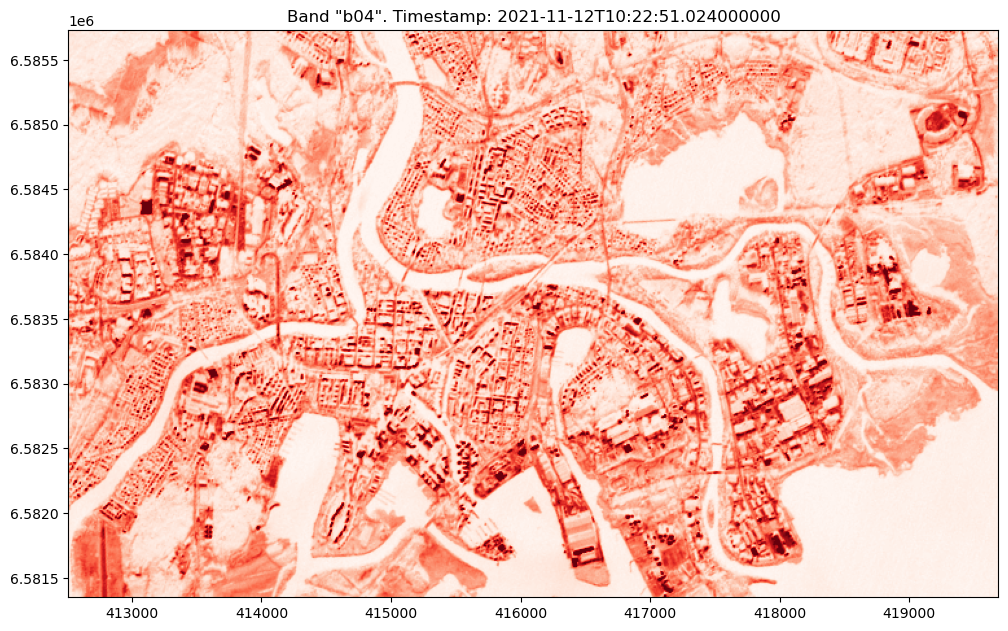

array([[[[238., 254., 312., ..., 465., 410., 438.],
         [273., 330., 332., ..., 493., 367., 333.],
         [321., 383., 313., ..., 298., 230., 279.],
         ...,
         [214., 228., 245., ..., 233., 158., 217.],
         [277., 290., 269., ..., 238., 193., 195.],
         [244., 247., 262., ..., 187., 180., 184.]]]])

In [8]:
# 3. Use our tutorial helper function to view the data!
show_result(s2_image_data2, colormap="Reds")

## Diving Deeper into the DataArray

Now that we've explored the basics of datacubes, let's take a closer look at how the data is structured. We will download the same satellite data as before, but this time we'll examine it under the hood using `xarray`. This will give us a better understanding of how the data is organized across different dimensions like time, spectral bands, and spatial coordinates.

We'll work directly with the data in memory, avoiding the need to save files, and focus on how `xarray` handles this complex, multi-dimensional data. This will help us appreciate the power of `xarray` for geospatial analysis, especially when dealing with large Earth Observation datasets.


In [9]:
import xarray as xr
import io

# Downloading the result as a NetCDF file (in memory)
s2_netcdf_data = datacube.download(format="NetCDF")

# Load the NetCDF data into an xarray.Dataset directly from memory
dataset = xr.open_dataset(io.BytesIO(s2_netcdf_data))

# If you prefer working with a DataArray, you can convert the Dataset to a DataArray
data_array = dataset.to_array()

# Inspect the DataArray structure
print(data_array)

<xarray.DataArray (variable: 1, t: 1, y: 438, x: 718)> Size: 3MB
array([[[[238., 254., 312., ..., 465., 410., 438.],
         [273., 330., 332., ..., 493., 367., 333.],
         [321., 383., 313., ..., 298., 230., 279.],
         ...,
         [214., 228., 245., ..., 233., 158., 217.],
         [277., 290., 269., ..., 238., 193., 195.],
         [244., 247., 262., ..., 187., 180., 184.]]]])
Coordinates:
  * t            (t) datetime64[ns] 8B 2021-11-12T10:22:51.024000
  * y            (y) float64 4kB 6.586e+06 6.586e+06 ... 6.581e+06 6.581e+06
  * x            (x) float64 6kB 4.125e+05 4.125e+05 ... 4.197e+05 4.197e+05
    spatial_ref  int32 4B ...
  * variable     (variable) object 8B 'b04'
Attributes:
    crs:         EPSG:3006
    nodata:      -9999
    collection:  s2_msi_l2a


### Understanding the DataArray Structure

The output you received is an `xarray.DataArray` that provides a multi-dimensional view of your satellite data, organized across several key dimensions:

- **Dimensions**:
  - **variable**: This dimension represents the spectral bands you've loaded. In this case, there is one band:`'b04'`(red).
  - **t (time)**: There is one time step in this data, corresponding to the date and time `2021-11-12T10:22:51.024000`. This dimension would expand if you had data across multiple dates.
  - **y and x**: These are the spatial dimensions, representing the geographical coordinates. The values in these dimensions maps each pixel to the location on Earth's surface, mapped according to the specified Coordinate Reference System (CRS).

- **Attributes**:
  - **crs**: The `EPSG:3006` CRS attribute indicates the specific projection system used to map the x and y coordinates to real-world locations.
  - **nodata**: The `nodata` attribute defines the value `-9999` used to represent missing or invalid data within the dataset.
  - **collection**: This attribute indicates the source of the data, which in this case is the Sentinel-2 Level-2A product (`s2_msi_l2a`).
  - **datetime_from_dim**: This attribute captures the exact time the data was recorded.

### Differences Between NetCDF and GeoTIFF

When working with satellite data in OpenEO, there are key differences between using NetCDF and GeoTIFF formats:

1. **File Structure**:
   - **NetCDF**: A single file that stores multi-dimensional data (time, bands, spatial dimensions) in a structured format, making it easy to handle complex datasets.
   - **GeoTIFF**: Typically represents a single band or time step per file. Multiple files are needed if you have data across multiple bands or time steps.

2. **Loading Process**:
   - **NetCDF**: Loaded directly into an `xarray.Dataset` or `xarray.DataArray`, with all dimensions organized automatically.
   - **GeoTIFF**: Requires loading multiple files individually and then concatenating them into a single `xarray.DataArray` for multi-dimensional analysis.

3. **Spatial and Spectral Dimensions**:
   - **NetCDF**: Naturally supports multi-dimensional arrays, simplifying the management of multiple time steps and bands.
   - **GeoTIFF**: Requires manual stacking of bands or time steps, often involving concatenation across the appropriate dimension.

4. **Attributes and Metadata**:
   - **NetCDF**: Stores all metadata and attributes within the same file, providing a cohesive dataset.
   - **GeoTIFF**: Metadata is stored separately in each file, requiring consistent management across multiple files.

#### Example of Loading GeoTIFF Files

```python
import rasterio
import xarray as xr
import glob

# List all the GeoTIFF files corresponding to different time steps or bands
tif_files = sorted(glob.glob("output_directory/*.tif"))

# Load each GeoTIFF into an xarray.DataArray and concatenate along the desired dimension
data_array = xr.concat([xr.open_rasterio(f) for f in tif_files], dim="time")

# Inspect the DataArray structure
print(data_array)


### Summary:
- **GeoTIFF**: Multiple files tarred together when there are multiple time steps, suitable for raster data.
- **NetCDF**: A single file containing all dimensions, ideal for scientific analysis and handling large datasets.
- **GeoJSON**: For scalar results, focusing on vector data or summary statistics.
### Further Experimentation
Experiment witht the different download formats

```python
# Downloading the result as a GeoTIFF
s2_image_data = res.download(format="GTiff")

# If multiple time steps, the data is tarred
# Extract the tar archive and load the GeoTIFF files if necessary
import tarfile
import xarray as xr

with tarfile.open(fileobj=io.BytesIO(s2_image_data)) as tar:
    tar.extractall("output_directory")

# Load a GeoTIFF into an xarray.DataArray for further analysis
import rasterio
import xarray as xr

# Example of loading one of the TIFF files
with rasterio.open("output_directory/some_image.tif") as src:
    data_array = xr.open_rasterio(src)

# Downloading the result as a NetCDF
s2_netcdf_data = res.download(format="NetCDF")

# Load the NetCDF file into an xarray.DataArray or Dataset
dataset = xr.open_dataset(io.BytesIO(s2_netcdf_data))
